In [84]:
import pandas as pd
%matplotlib inline

In [27]:
tabela = pd.read_csv('vozila brez nepotrebnih vejc in euro.csv', sep=';', encoding='latin1', low_memory=False)
tabela = tabela[['Registrsko obmocje', 'Masa', 'Znamka', 'Masa', 'ccm', 'Moc', 'Gorivo',
                 'Najvisja hitrost', 'CO2', 'Poraba goriva', 'Okoljevarstvena oznaka', 'Leto izdelave']]

In [126]:
#tabela[:10]

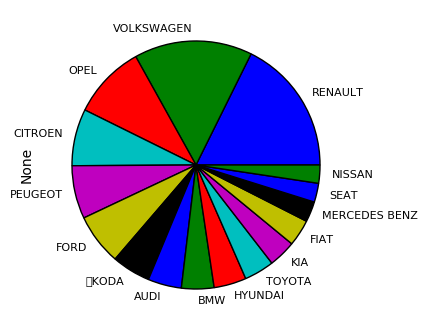

In [143]:
znamke = tabela.groupby('Znamka')
znamke.size().sort_values(ascending=False)[:16].plot(kind='pie',figsize=(4, 4), fontsize=8)

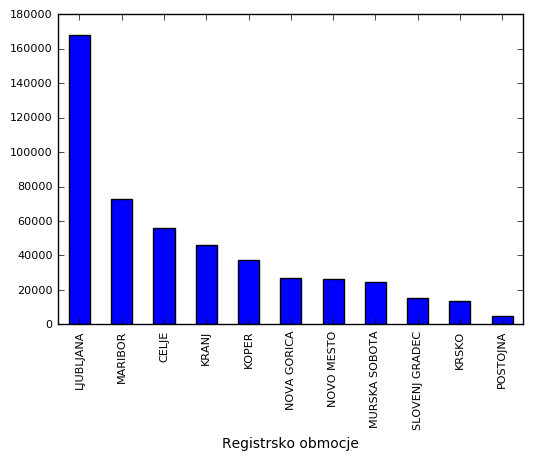

In [142]:
stevilo = tabela.groupby('Registrsko obmocje')
stevilo.size().sort_values(ascending=False).plot(kind='bar',figsize=(6, 4), fontsize=8)

In [61]:
poraba = tabela[['Registrsko obmocje', 'Poraba goriva', 'CO2']]

In [140]:
skupna_po_krajih = poraba.groupby('Registrsko obmocje')[['Poraba goriva', 'CO2']].mean()
poraba_po_krajih = pd.DataFrame(skupna_po_krajih).sort_values('CO2')
PORABA = poraba_po_krajih
PORABA['gorivo%'] = (PORABA['Poraba goriva'] - min(PORABA['Poraba goriva'])) / (max(PORABA['Poraba goriva']) - min(PORABA['Poraba goriva']))
PORABA['CO2%'] = (PORABA['CO2'] - min(PORABA['CO2'])) / (max(PORABA['CO2']) - min(PORABA['CO2']))
#PORABA

In [144]:
Stolpec z odstotki sem dodal, da bi z grafa lahko razbral (ne)ujemanje med porabo goriva in izpustom CO2. 

SyntaxError: invalid syntax (<ipython-input-144-0e6a8f41960f>, line 1)

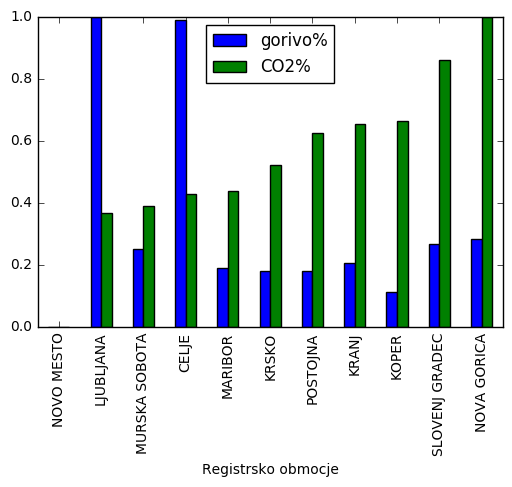

In [141]:
PORABA[['gorivo%', 'CO2%']].plot(kind='bar')

In [130]:
moc = tabela[['Registrsko obmocje', 'Moc', 'Leto izdelave', 'Okoljevarstvena oznaka']]

In [136]:
moc_kraji = moc.groupby('Registrsko obmocje')[['Moc', 'Leto izdelave', 'Okoljevarstvena oznaka']].mean()
moc_po_krajih = pd.DataFrame(moc_kraji).sort_values('Leto izdelave')
MOC = moc_po_krajih
MOC['moc%'] = (MOC['Moc'] - min(MOC['Moc'])) / (max(MOC['Moc']) - min(MOC['Moc']))
MOC['leto%'] = (MOC['Leto izdelave'] - min(MOC['Leto izdelave'])) / (max(MOC['Leto izdelave']) - min(MOC['Leto izdelave']))
MOC['okolje%'] = (MOC['Okoljevarstvena oznaka'] - min(MOC['Okoljevarstvena oznaka'])) / (max(MOC['Okoljevarstvena oznaka']) - min(MOC['Okoljevarstvena oznaka']))

MOC

,Moc,Leto izdelave,Okoljevarstvena oznaka,moc%,leto%,okolje%
Registrsko obmocje,,,,,,
NOVA GORICA,81.844493,2008.553763,4.218413,0.498877,0.000000,0.000000
KRSKO,81.116119,2008.753459,4.269966,0.392085,0.144263,0.166042
KOPER,85.227873,2009.070819,4.334955,0.994940,0.373528,0.375360
NOVO MESTO,79.755520,2009.086404,4.323958,0.192597,0.384787,0.339941
CELJE,81.639676,2009.097007,4.337543,0.468847,0.392446,0.383696
KRANJ,81.494087,2009.226889,4.357914,0.447501,0.486275,0.449307
MARIBOR,81.148100,2009.301816,4.370308,0.396774,0.540403,0.489226
SLOVENJ GRADEC,82.887269,2009.347841,4.387249,0.651766,0.573652,0.543788
MURSKA SOBOTA,78.441921,2009.451257,4.411332,0.000000,0.648362,0.621357


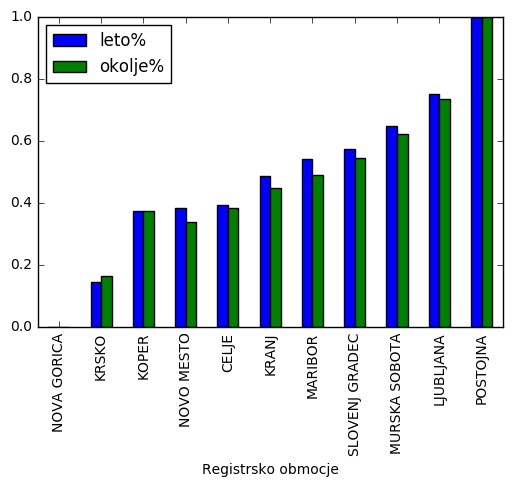

In [138]:
MOC[['leto%', 'okolje%']].plot(kind='bar')

In [14]:
co2 = tabela[['Registrsko obmocje', 'CO2']]

In [15]:
co2_kraji = co2.groupby('Registrsko obmocje')['CO2'].mean()
co2_po_krajih = pd.DataFrame(co2_kraji).sort_values('CO2')
CO2 = co2_po_krajih
CO2

,CO2
Registrsko obmocje,
NOVO MESTO,142.099415
LJUBLJANA,144.079255
MURSKA SOBOTA,144.198351
CELJE,144.417368
MARIBOR,144.462349
KRSKO,144.919896
POSTOJNA,145.467107
KRANJ,145.626757
KOPER,145.684547


In [16]:
leto = tabela[['Registrsko obmocje', 'Leto izdelave']]

In [25]:
leto_kraji = leto.groupby('Registrsko obmocje')['Leto izdelave'].mean()
leto_po_krajih = pd.DataFrame(leto_kraji).sort_values('Leto izdelave')
LETO = leto_po_krajih
LETO

,Leto izdelave
Registrsko obmocje,
NOVA GORICA,2008.553763
KRSKO,2008.753459
KOPER,2009.070819
NOVO MESTO,2009.086404
CELJE,2009.097007
KRANJ,2009.226889
MARIBOR,2009.301816
SLOVENJ GRADEC,2009.347841
MURSKA SOBOTA,2009.451257


In [18]:
euro = tabela[['Registrsko obmocje', 'Okoljevarstvena oznaka']]

In [19]:
euro_kraji = euro.groupby('Registrsko obmocje')['Okoljevarstvena oznaka'].mean()
euro_kraji
euro_po_krajih = pd.DataFrame(euro_kraji).sort_values('Okoljevarstvena oznaka')
EURO = euro_po_krajih
EURO

,Okoljevarstvena oznaka
Registrsko obmocje,
NOVA GORICA,4.218413
KRSKO,4.269966
NOVO MESTO,4.323958
KOPER,4.334955
CELJE,4.337543
KRANJ,4.357914
MARIBOR,4.370308
SLOVENJ GRADEC,4.387249
MURSKA SOBOTA,4.411332


In [20]:
#HURA, leto izdelave se ujema z okoljevarstveno oznako!!